In [10]:
pip install rdkit


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
pip install chainer-chemistry

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import logging
from rdkit import RDLogger
from chainer_chemistry import datasets

lg = RDLogger.logger()
lg.setLevel(RDLogger.CRITICAL)

logging.basicConfig(level=logging.INFO)

In [13]:
dataset_filepath = datasets.get_qm9_filepath()

print('dataset_filepath =', dataset_filepath)

dataset_filepath = C:\Users\riakh\.chainer\dataset\pfnet/chainer/qm9\qm9.csv


In [14]:
from chainer_chemistry.dataset.preprocessors.ggnn_preprocessor import \
    GGNNPreprocessor
    
preprocessor = GGNNPreprocessor()
dataset, dataset_smiles = datasets.get_qm9(preprocessor, labels=None, return_smiles=True)

100%|██████████| 133885/133885 [00:40<00:00, 3294.37it/s]
INFO:chainer_chemistry.dataset.parsers.data_frame_parser:Preprocess finished. FAIL 0, SUCCESS 133885, TOTAL 133885


In [15]:
print('dataset information...')
print('dataset', type(dataset), len(dataset))

print('smiles information...')
print('dataset_smiles', type(dataset_smiles), len(dataset_smiles))

dataset information...
dataset <class 'chainer_chemistry.datasets.numpy_tuple_dataset.NumpyTupleDataset'> 133885
smiles information...
dataset_smiles <class 'numpy.ndarray'> 133885


In [16]:
print('length of dataset:', len(dataset))

length of dataset: 133885


In [17]:
# Print first 5 SMILES strings
for i in range(5):
    print(f"SMILES {i+1}: {dataset_smiles[i]}")


SMILES 1: C
SMILES 2: N
SMILES 3: O
SMILES 4: C#C
SMILES 5: C#N


In [18]:
print("Total number of SMILES:", len(dataset_smiles))
print("Type of dataset_smiles:", type(dataset_smiles))


Total number of SMILES: 133885
Type of dataset_smiles: <class 'numpy.ndarray'>


In [19]:
pip install torch-geometric

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
print("First few SMILES entries:")
for i, smiles in enumerate(dataset_smiles[:5]): 
    print(f"{i + 1}: {smiles}")


First few SMILES entries:
1: C
2: N
3: O
4: C#C
5: C#N


In [ ]:
print("First few entries of the dataset:")
for i in range(min(5, len(dataset))):  
    print(f"Entry {i}: {dataset[i]}")


First few entries of the dataset:
Entry 0: (array([6]), array([[[0.]],

       [[0.]],

       [[0.]],

       [[0.]]], dtype=float32), array([ 1.5771181e+02,  1.5770998e+02,  1.5770699e+02,  0.0000000e+00,
        1.3210000e+01, -3.8769999e-01,  1.1710000e-01,  5.0480002e-01,
        3.5364101e+01,  4.4748999e-02, -4.0478931e+01, -4.0476063e+01,
       -4.0475117e+01, -4.0498596e+01,  6.4689999e+00], dtype=float32))
Entry 1: (array([7]), array([[[0.]],

       [[0.]],

       [[0.]],

       [[0.]]], dtype=float32), array([ 2.9360974e+02,  2.9354111e+02,  1.9139397e+02,  1.6256000e+00,
        9.4600000e+00, -2.5700000e-01,  8.2900003e-02,  3.3989999e-01,
        2.6156300e+01,  3.4357999e-02, -5.6525887e+01, -5.6523026e+01,
       -5.6522083e+01, -5.6544960e+01,  6.3160000e+00], dtype=float32))
Entry 2: (array([8]), array([[[0.]],

       [[0.]],

       [[0.]],

       [[0.]]], dtype=float32), array([ 7.9958813e+02,  4.3790387e+02,  2.8294547e+02,  1.8511000e+00,
        6.3099999e+

In [ ]:
import torch.optim.lr_scheduler as lr_scheduler
import pennylane as qml
import torch
from pennylane import numpy as np
import numpy as np
import torch
from torch_geometric.data import Data
from rdkit import Chem
import matplotlib.pyplot as plt


In [ ]:
num_atoms = 4  

dev = qml.device("default.qubit", wires=num_atoms)

encoded_graph = np.random.rand(num_atoms, 2) * np.pi  

layer_params = {
    'rzz_params': [np.pi / 4, np.pi / 3, np.pi / 2],  
    'theta': [np.pi / 6, np.pi / 5, np.pi / 4],
    'phi': [np.pi / 8, np.pi / 7, np.pi / 6],
    'omega': [np.pi / 9, np.pi / 8, np.pi / 7],
    'edu': [np.pi / 10, np.pi / 9]  
}


@qml.qnode(dev, interface='torch', diff_method="backprop")
def visualized_circuit():
    """Visualizes the full quantum circuit for a single encoded graph"""
    
    
    for i in range(num_atoms):
        qml.RY(encoded_graph[i][0], wires=i)
        qml.RZ(encoded_graph[i][1], wires=i)

    for layer in range(3):
        rzz_param = layer_params['rzz_params'][layer]
        for i in range(num_atoms):
            qml.U3(layer_params['theta'][layer], layer_params['phi'][layer], layer_params['omega'][layer], wires=i)

        
        for start in range(num_atoms):
            for end in range(start + 1, num_atoms):
                qml.RZ(layer_params['edu'][0], wires=start)
                qml.RX(layer_params['edu'][1], wires=start)
                qml.RZ(layer_params['edu'][0], wires=end)
                qml.RX(layer_params['edu'][1], wires=end)
                qml.CNOT(wires=[start, end])
                qml.RZ(rzz_param, wires=end)
                qml.CNOT(wires=[start, end])
                qml.RX(layer_params['edu'][0], wires=start)
                qml.RZ(layer_params['edu'][1], wires=start)
                qml.RX(layer_params['edu'][0], wires=end)
                qml.RZ(layer_params['edu'][1], wires=end)

    return [qml.expval(qml.PauliZ(i)) for i in range(num_atoms)]

print("Quantum Circuit Diagram:")
circuit_diagram = qml.draw(visualized_circuit)
print(circuit_diagram())


Quantum Circuit Diagram:
0: ──RY(2.61)──RZ(0.78)──U3(0.52,0.39,0.35)──RZ(0.31)──RX(0.35)─╭●───────────╭●──RX(0.31)──RZ(0.35)
1: ──RY(2.47)──RZ(0.02)──U3(0.52,0.39,0.35)──RZ(0.31)──RX(0.35)─╰X──RZ(0.79)─╰X──RX(0.31)──RZ(0.35)
2: ──RY(1.95)──RZ(2.50)──U3(0.52,0.39,0.35)──RZ(0.31)──RX(0.35)────────────────────────────────────
3: ──RY(1.97)──RZ(1.16)──U3(0.52,0.39,0.35)──RZ(0.31)──RX(0.35)────────────────────────────────────

───RZ(0.31)──RX(0.35)─╭●───────────╭●──RX(0.31)──RZ(0.35)──RZ(0.31)──RX(0.35)─╭●───────────╭●
──────────────────────│────────────│──────────────────────────────────────────│────────────│─
──────────────────────╰X──RZ(0.79)─╰X──RX(0.31)──RZ(0.35)─────────────────────│────────────│─
──────────────────────────────────────────────────────────────────────────────╰X──RZ(0.79)─╰X

───RX(0.31)──RZ(0.35)──U3(0.63,0.45,0.39)──RZ(0.31)──RX(0.35)──────────────────────────────
───RZ(0.31)──RX(0.35)─╭●────────────────────────────╭●─────────RX(0.31)──RZ(0.35)──RZ(0.31)
───RZ(0.31)──

In [ ]:
def smiles_to_graph_and_targets(smiles_list, dataset):
    data_list = []
    targets = []
    for smiles, data in zip(smiles_list, dataset):
        properties = data if len(data) > 0 else None
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            continue

        atomic_nums = [atom.GetAtomicNum() for atom in mol.GetAtoms()]
        aromatics = [atom.GetIsAromatic() for atom in mol.GetAtoms()]
        hybridizations = [int(atom.GetHybridization()) for atom in mol.GetAtoms()]
        num_hydrogens = [atom.GetTotalNumHs() for atom in mol.GetAtoms()]

        x = np.column_stack([atomic_nums, aromatics, hybridizations, num_hydrogens])
        edge_index = []
        edge_attr = []
        bond_info = []

        for bond in mol.GetBonds():
            start, end = bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()
            bond_type = bond.GetBondType()
            bond_label = {Chem.rdchem.BondType.SINGLE: 'single',
                          Chem.rdchem.BondType.DOUBLE: 'double',
                          Chem.rdchem.BondType.TRIPLE: 'triple',
                          Chem.rdchem.BondType.AROMATIC: 'aromatic'}.get(bond_type, 'single')
            bond_info.append((start, end, bond_label))
            edge_attr.append([1 if bond_label == bl else 0 for bl in ['single', 'double', 'triple', 'aromatic']])
            edge_index.append([start, end])

        edge_index = torch.tensor(edge_index, dtype=torch.long).t()
        edge_attr = torch.tensor(edge_attr, dtype=torch.float)
        x = torch.tensor(x, dtype=torch.float)
        data = Data(x=x, edge_index=edge_index, edge_attr=edge_attr, bond_info=bond_info)
        data_list.append(data)

        if properties is not None:
            target_value = properties[2][7]  # the target is in the 7th column of the third block
            targets.append(target_value)

    targets = torch.tensor(targets, dtype=torch.float)
    return data_list, targets

In [ ]:
def split_data(graph_data, targets, train_size, val_size):
    print(f"Total graphs: {len(graph_data)}, Total targets: {len(targets)}")
    indices = np.random.permutation(len(graph_data))
    train_indices = indices[:train_size]
    val_indices = indices[train_size:train_size + val_size]

    train_data = [graph_data[i] for i in train_indices]
    train_targets = targets[train_indices]
    val_data = [graph_data[i] for i in val_indices]
    val_targets = targets[val_indices]

    return (train_data, train_targets), (val_data, val_targets)

In [ ]:
def filter_graphs_by_num_atoms(graph_data, targets, num_atoms=6):
    filtered_graphs = [graph for graph in graph_data if graph.num_nodes == num_atoms]
    filtered_targets = [targets[i] for i, graph in enumerate(graph_data) if graph.num_nodes == num_atoms]
    return filtered_graphs, torch.tensor(filtered_targets, dtype=torch.float)

def batch_processing(graph_data, targets, batch_size):
    num_batches = len(graph_data) // batch_size
    for i in range(num_batches):
        batch_data = graph_data[i * batch_size: (i + 1) * batch_size]
        batch_targets = targets[i * batch_size: (i + 1) * batch_size]
        yield batch_data, batch_targets

In [ ]:
def quantum_encode(features, use_atomic_num=True, use_nh=False, use_aromaticity=True, use_hybridization=True):
    encoded_params = []
    for feature in features:
        z, nh, aromatic, hybridization = feature.tolist()
        ry_angle, rz_angle = 0, 0

        if use_atomic_num and not use_nh and use_aromaticity and use_hybridization:
            ry_angle = (2 * z - 7) * np.pi / 4 if z is not None else 0
            rz_angle = (-1)**(2 * hybridization - 1) * np.pi / 6 if hybridization is not None else 0
        elif use_atomic_num and use_nh:
            ry_angle = (2 * z - 7) * np.pi / 4 if z is not None else 0
            rz_angle = 2 * np.pi * nh / 5 if nh is not None else 0
        elif use_atomic_num:
            if z in [5, 6, 7]:
                ry_angle = np.cos(-1 / 3)
            if z == 6:
                rz_angle = 2 * np.pi / 3
            elif z == 7:
                rz_angle = -2 * np.pi / 3

        encoded_params.append([ry_angle, rz_angle])
    return np.array(encoded_params)


In [ ]:
def default_EDU(bond_params, rzz_param, wires):
    #if len(wires) < 2:
        #raise ValueError(f"Expected 'wires' to contain at least 2 elements, but got {len(wires)} elements: {wires}")
    
    #print(f"Applying EDU on wires: {wires}")
    
    qml.RZ(bond_params[0], wires=wires[0])
    qml.RX(bond_params[1], wires=wires[0])
    qml.RZ(bond_params[0], wires=wires[1])
    qml.RX(bond_params[1], wires=wires[1])
    qml.CNOT(wires=wires)
    qml.RZ(rzz_param, wires=wires[1])
    qml.CNOT(wires=wires)
    qml.RX(bond_params[0], wires=wires[0])
    qml.RZ(bond_params[1], wires=wires[0])
    qml.RX(bond_params[0], wires=wires[1])
    qml.RZ(bond_params[1], wires=wires[1])

In [ ]:
def quantum_circuit_single(graph, layer_params):
    num_layers = 3
    num_atoms = graph.num_nodes
    dev = qml.device('default.qubit', wires=num_atoms)

    @qml.qnode(dev, interface='torch')
    def circuit():
        encoded_features = quantum_encode(graph.x)
        for i in range(num_atoms):
            qml.RY(encoded_features[i][0], wires=i)
            qml.RZ(encoded_features[i][1], wires=i)

        for layer in range(num_layers):
            rzz_param = layer_params['rzz_params'][layer]
            for i in range(num_atoms):
                qml.U3(layer_params['theta'][layer], layer_params['phi'][layer], layer_params['omega'][layer], wires=i)
            bond_order = ['single', 'aromatic', 'double', 'triple']
            sorted_bonds = sorted(graph.bond_info, key=lambda x: bond_order.index(x[2]))
            for start, end, bond_type in sorted_bonds:
                bond_edu_params = layer_params['edu'][bond_type]
                default_EDU(bond_edu_params, rzz_param, [start, end])
        return [qml.expval(qml.PauliZ(i)) for i in range(num_atoms)]

    qml_results = circuit()
    return torch.stack(qml_results).float()

def quantum_circuit_batch(batch_data, params):
    results = []
    for graph in batch_data:
        result = quantum_circuit_single(graph, params)
        results.append(result)
    return torch.stack(results)

In [ ]:
def initialize_params(layers):
    params = {
        'theta': [torch.nn.Parameter(torch.rand(1), requires_grad=True) for _ in range(layers)],
        'phi': [torch.nn.Parameter(torch.rand(1), requires_grad=True) for _ in range(layers)],
        'omega': [torch.nn.Parameter(torch.rand(1), requires_grad=True) for _ in range(layers)],
        'rzz_params': [torch.nn.Parameter(torch.rand(1), requires_grad=True) for _ in range(layers)],
        'edu': {
            'single': torch.nn.Parameter(torch.rand(2), requires_grad=True),
            'aromatic': torch.nn.Parameter(torch.rand(2), requires_grad=True),
            'double': torch.nn.Parameter(torch.rand(2), requires_grad=True),
            'triple': torch.nn.Parameter(torch.rand(2), requires_grad=True)
        }
    }
    return params

Total graphs: 600, Total targets: 600
Epoch 1: Train Loss = 0.014622890506871045
Epoch 2: Train Loss = 0.004603677778504789
Epoch 3: Train Loss = 0.0032103301491588354
Epoch 4: Train Loss = 0.0028258105856366457
Epoch 5: Train Loss = 0.002716750092804432
Validation Loss after Epoch 5: 0.002391439490020275
Epoch 6: Train Loss = 0.0026186041068285704
Epoch 7: Train Loss = 0.0026364298537373543
Epoch 8: Train Loss = 0.0026285178260877728
Epoch 9: Train Loss = 0.0026166158029809596
Epoch 10: Train Loss = 0.0026236892445012927
Validation Loss after Epoch 10: 0.002391819818876684
Epoch 11: Train Loss = 0.0026220299769192934
Epoch 12: Train Loss = 0.0026199583197012545
Epoch 13: Train Loss = 0.0026211415650323035
Epoch 14: Train Loss = 0.0026202219538390636
Epoch 15: Train Loss = 0.0026194581063464285
Validation Loss after Epoch 15: 0.0023922051885165276
Epoch 16: Train Loss = 0.002619159687310457
Epoch 17: Train Loss = 0.0026183787500485777
Epoch 18: Train Loss = 0.002617740212008357
Epoch 1

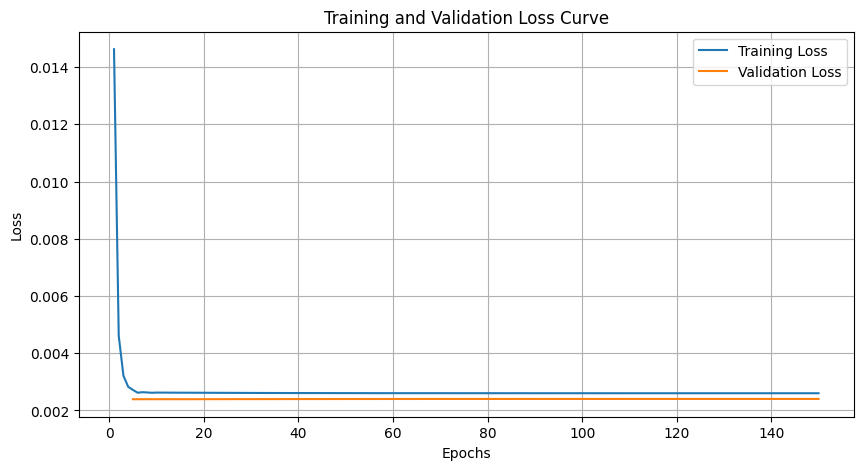

In [ ]:

def train_and_plot(train_data, train_targets, val_data, val_targets, batch_size, total_epochs=150, validate_every=5):
    layers = 3
    params = initialize_params(layers)

    all_params = []
    for key in params:
        if isinstance(params[key], dict):
            for subkey in params[key]:
                all_params.append(params[key][subkey])
        else:
            all_params.extend(params[key])

    r0 = torch.nn.Parameter(torch.tensor(0.1, requires_grad=True))
    r1 = torch.nn.Parameter(torch.tensor(0.2, requires_grad=True))
    all_params.extend([r0, r1])

    optimizer = torch.optim.Adam(all_params, lr=0.1)  
    scheduler = lr_scheduler.ExponentialLR(optimizer, gamma=0.95)  

    loss_func = torch.nn.MSELoss()

    train_losses = []
    val_losses = []

    for epoch in range(total_epochs):
        total_train_loss = 0
        train_batches = list(batch_processing(train_data, train_targets, batch_size))
        for batch_data, batch_targets in train_batches:
            optimizer.zero_grad()
            predictions = quantum_circuit_batch(batch_data, params)
            adjusted_predictions = r0 + r1 * torch.sum(predictions, dim=1) / len(predictions[0])
            loss = loss_func(adjusted_predictions, batch_targets)
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()

        scheduler.step()  # Update the learning rate
        epoch_train_loss = total_train_loss / len(train_batches)
        train_losses.append(epoch_train_loss)
        print(f"Epoch {epoch+1}: Train Loss = {epoch_train_loss}")

        if (epoch + 1) % validate_every == 0:
            total_val_loss = 0
            val_batches = list(batch_processing(val_data, val_targets, batch_size))
            for batch_data, batch_targets in val_batches:
                predictions = quantum_circuit_batch(batch_data, params)
                adjusted_predictions = r0 + r1 * torch.sum(predictions, dim=1) / len(predictions[0])
                loss = loss_func(adjusted_predictions, batch_targets)
                total_val_loss += loss.item()

            epoch_val_loss = total_val_loss / len(val_batches)
            val_losses.append(epoch_val_loss)
            print(f"Validation Loss after Epoch {epoch+1}: {epoch_val_loss}")

    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
    plt.plot(range(validate_every, len(val_losses) * validate_every + 1, validate_every), val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Curve')
    plt.legend()
    plt.grid(True)
    plt.show()



graph_data, targets = smiles_to_graph_and_targets(dataset_smiles, dataset)
filtered_graphs, filtered_targets = filter_graphs_by_num_atoms(graph_data, targets, num_atoms=6)
assert len(filtered_graphs) >= 600, "Not enough samples with 6 atoms"
selected_graphs = filtered_graphs[:600]
selected_targets = filtered_targets[:600]
(train_data, train_targets), (val_data, val_targets) = split_data(selected_graphs, selected_targets, 300, 300)
train_and_plot(train_data, train_targets, val_data, val_targets, batch_size=30, total_epochs=150, validate_every=5)